# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
%config InteractiveShell.ast_node_interactivity = 'all'

# Loading Dataset

In [3]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Basic EDA

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.describe(include = 'object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [6]:
data.shape

(1000, 8)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data['sum'] = data['math score'] + data['reading score'] + data['writing score'] # making new feature which takes overall score

In [10]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
lst = ['math score','reading score','writing score','sum']
features_cat = ['gender','race/ethnicity','parental level of education','test preparation course','lunch']
features_num = ['math score','reading score','writing score','sum']
data_copy = data.drop( features_cat,axis = 'columns')

# KMeans Clustering 

##### To classify students into groups and check which feature affects the scores significantly

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

KMeans(n_clusters=20)

KMeans(n_clusters=21)

KMeans(n_clusters=22)

KMeans(n_clusters=23)

KMeans(n_clusters=24)

KMeans(n_clusters=25)

KMeans(n_clusters=26)

KMeans(n_clusters=27)

KMeans(n_clusters=28)

KMeans(n_clusters=29)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

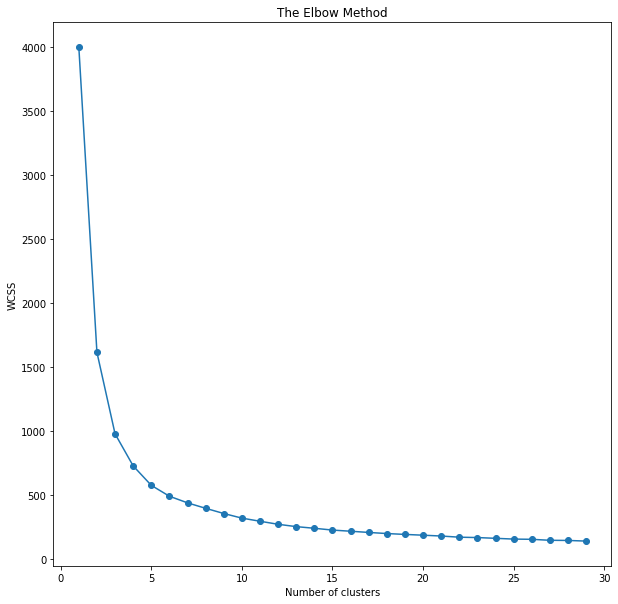

In [13]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num ))
X = preprocessor.fit_transform(data_copy)
wcss=[]
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.figure(figsize = (10,10))
plt.plot(number_clusters,wcss,marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
kmeans = KMeans(7)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 

KMeans(n_clusters=7)

In [15]:
# %config InteractiveShell.ast_node_interactivity = 'last'
for i in lst:
    df = pd.concat([data_with_clusters.loc[data_with_clusters['Clusters'] == 0][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 1][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 2][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 3][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 4][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 5][i].describe(),
    data_with_clusters.loc[data_with_clusters['Clusters'] == 6][i].describe()],axis = 'columns')
    df.columns = [0,1,2,3,4,5,6] 
    df.style.set_caption(i.title())
 
    

,0,1,2,3,4,5,6
count,172.000000,210.000000,37.000000,76.000000,217.000000,140.000000,148.000000
mean,57.895349,71.790476,32.135135,90.394737,65.046083,48.471429,81.722973
std,6.732185,6.137492,10.477919,6.509642,6.787631,6.515552,5.999797
min,40.000000,57.000000,0.000000,77.000000,45.000000,32.000000,67.000000
25%,53.000000,67.000000,27.000000,85.000000,60.000000,44.000000,77.000000
50%,58.000000,71.500000,33.000000,91.000000,65.000000,49.000000,81.000000
75%,62.000000,76.000000,39.000000,96.250000,70.000000,53.000000,87.000000
max,73.000000,87.000000,51.000000,100.000000,82.000000,64.000000,95.000000


,0,1,2,3,4,5,6
count,172.000000,210.000000,37.000000,76.000000,217.000000,140.000000,148.000000
mean,59.686047,76.590476,35.972973,93.776316,68.105991,51.092857,83.979730
std,4.281776,4.104369,7.201414,4.865110,4.010728,5.300871,4.512220
min,47.000000,66.000000,17.000000,82.000000,57.000000,37.000000,73.000000
25%,57.000000,74.000000,31.000000,90.000000,65.000000,48.000000,81.000000
50%,60.000000,76.000000,38.000000,94.000000,68.000000,52.000000,84.000000
75%,63.000000,79.000000,41.000000,99.000000,71.000000,55.000000,87.000000
max,72.000000,86.000000,48.000000,100.000000,79.000000,64.000000,94.000000


,0,1,2,3,4,5,6
count,172.000000,210.000000,37.000000,76.000000,217.000000,140.000000,148.000000
mean,58.383721,75.657143,33.594595,93.736842,67.649770,48.771429,82.763514
std,4.756451,4.600455,8.101644,4.736717,4.598401,5.041330,5.108831
min,47.000000,64.000000,10.000000,81.000000,57.000000,37.000000,69.000000
25%,55.000000,72.000000,30.000000,91.000000,64.000000,45.000000,79.000000
50%,58.000000,76.000000,36.000000,94.000000,68.000000,49.000000,83.000000
75%,62.000000,79.000000,38.000000,98.000000,70.000000,53.000000,87.000000
max,69.000000,87.000000,47.000000,100.000000,80.000000,60.000000,94.000000


,0,1,2,3,4,5,6
count,172.000000,210.000000,37.000000,76.000000,217.000000,140.000000,148.000000
mean,175.965116,224.038095,101.702703,277.907895,200.801843,148.335714,248.466216
std,7.365873,7.046563,21.977090,11.144120,6.620143,9.530421,7.890764
min,163.000000,212.000000,27.000000,263.000000,188.000000,126.000000,234.000000
25%,169.000000,218.000000,90.000000,268.000000,195.000000,141.750000,241.000000
50%,176.000000,224.000000,112.000000,275.000000,201.000000,150.000000,248.000000
75%,182.000000,230.000000,119.000000,288.250000,206.000000,156.000000,255.000000
max,189.000000,237.000000,124.000000,300.000000,213.000000,162.000000,263.000000


#### Here we can see that based on the scores the descending order of scoring clusters is 6,2,4,0,3,5,1 (overall scores)

#### Below we are grouping parental level of education into 3 classes low,medium and high. Also, we are simplifying the entries in the race/ethnicity column

In [16]:
data['parental level of education v2'] = data['parental level of education'].replace(['some high school','high school','associate\'s degree','some college',"bachelor's degree","master's degree"],['low','low','medium','low','high','high'])
data_with_clusters['parental level of education v2'] = data_with_clusters['parental level of education'].replace(['some high school','high school','associate\'s degree','some college',"bachelor's degree","master's degree"],['low','low','medium','low','high','high'])
data['race/ethnicity v2'] = data['race/ethnicity'].replace(['group A','group B','group C','group D','group E'],['A','B','C','D','E'])
data_with_clusters['race/ethnicity v2'] = data_with_clusters['race/ethnicity'].replace(['group A','group B','group C','group D','group E'],['A','B','C','D','E'])

#### Now we classify the clusters into ranks based on scores

In [17]:
ranksdf = df.sort_values(by = 'mean',axis = 1,ascending = False)
ranks = ranksdf.columns
ranks
data_with_clusters['Ranks'] = data_with_clusters['Clusters'].replace(ranks,[1,2,3,4,5,6,7]) #getting ranks based on scores

Int64Index([3, 6, 1, 4, 0, 5, 2], dtype='int64')

# Analysis based on Gender 

<Figure size 360x432 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='count'>

[Text(0, 0, '482'), Text(0, 0, '518')]

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Gender')

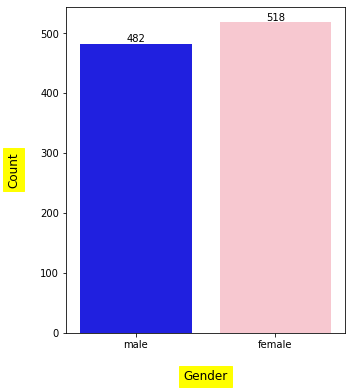

In [18]:
plt.figure(figsize = (5,6))
ax = plt.subplot(111)
sns.countplot(data['gender'],order = ['male','female'],palette = ['blue','pink'])
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Gender', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Here we see the count of females is greater than men but not by too much.

#### Some descriptive stats for individual and overall scores can be seen below

In [19]:
data.groupby(['gender'])['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


In [20]:
data.groupby(['gender'])['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


In [21]:
data.groupby(['gender'])['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


In [22]:
data.groupby(['gender'])['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,208.708494,43.625427,27.0,182.0,211.0,236.00,300.0
male,482.0,197.512448,41.096520,69.0,168.0,199.0,228.75,300.0


<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='gender', ylabel='mean'>

[Text(0, 0, '68.7282'), Text(0, 0, '63.6332')]

Text(0, 0.5, 'Avg. Math Score')

Text(0.5, 0, 'Gender')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='gender', ylabel='mean'>

[Text(0, 0, '65.473'), Text(0, 0, '72.6081')]

Text(0, 0.5, 'Avg. Reading Score')

Text(0.5, 0, 'Gender')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='gender', ylabel='mean'>

[Text(0, 0, '63.3112'), Text(0, 0, '72.4672')]

Text(0, 0.5, 'Avg. Writing Score')

Text(0.5, 0, 'Gender')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='gender', ylabel='mean'>

[Text(0, 0, '197.512'), Text(0, 0, '208.708')]

Text(0, 0.5, 'Avg. Sum')

Text(0.5, 0, 'Gender')

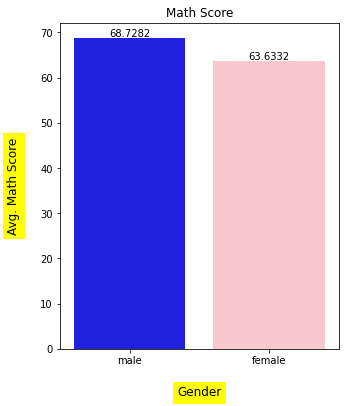

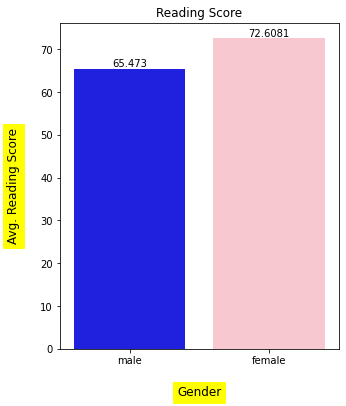

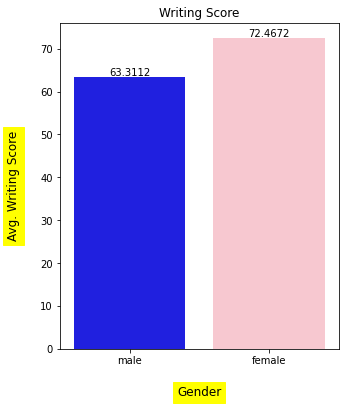

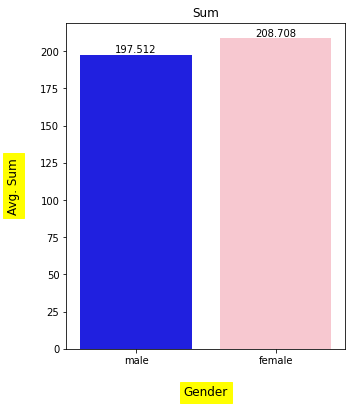

In [23]:
for i in lst:
    desc = data.groupby(['gender'])[i].describe()
    desc.reset_index(level = 0,inplace = True)
    plt.figure(figsize = (5,6))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.barplot(x = 'gender',y = 'mean' , data = desc, order = ['male','female'],palette = ['blue','pink'])
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(f'Avg. {i.title()}', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax.set_xlabel('Gender', size = 'large',backgroundcolor = 'yellow',labelpad = 20)


#### These plots indicate that on average male students did better in math but female students did better in reading and writing and hence, overall average scores were better for female students.

#### Distribution of scores is represented below to get a better idea in boxplot form and kdeplot form.

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='gender', ylabel='math score'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Math Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='gender', ylabel='reading score'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Reading Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='gender', ylabel='writing score'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Writing Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='gender', ylabel='sum'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Sum')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='math score', ylabel='Density'>

<AxesSubplot:xlabel='math score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Math Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Reading Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Writing Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='sum', ylabel='Density'>

<AxesSubplot:xlabel='sum', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Sum')

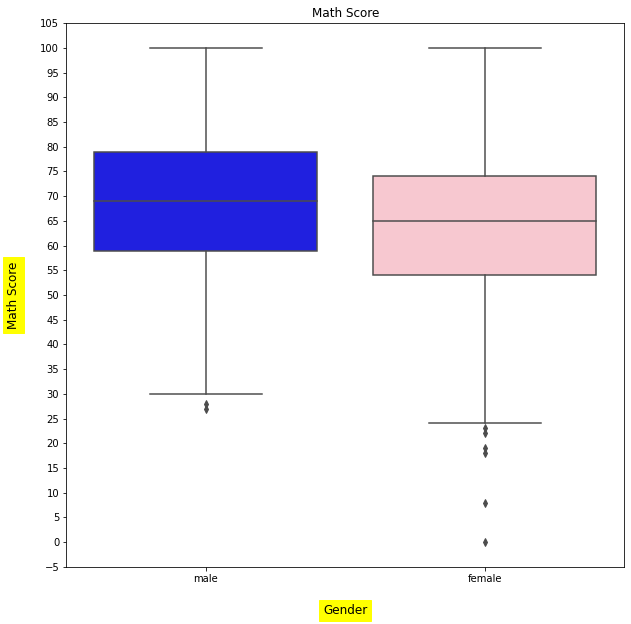

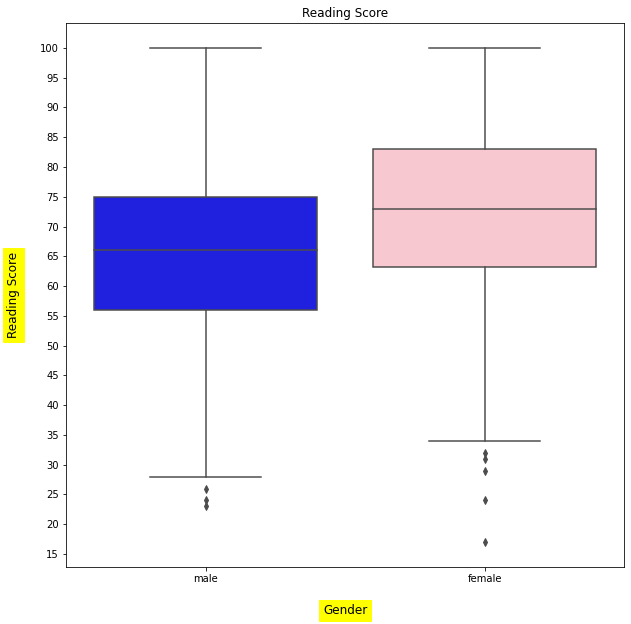

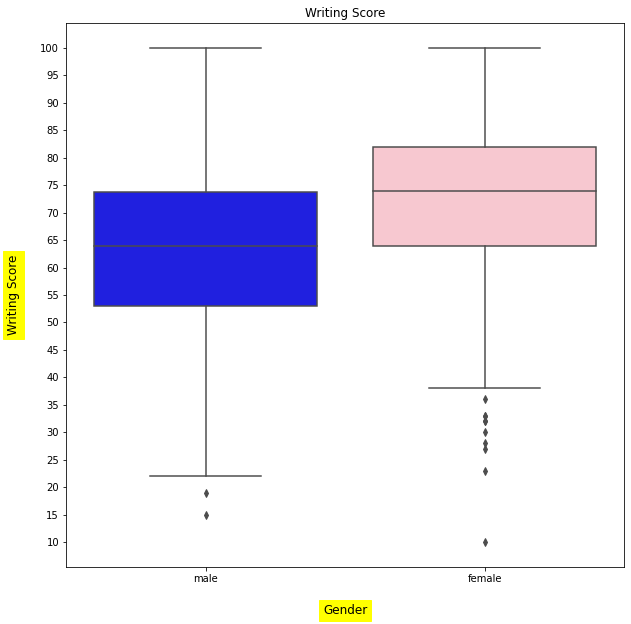

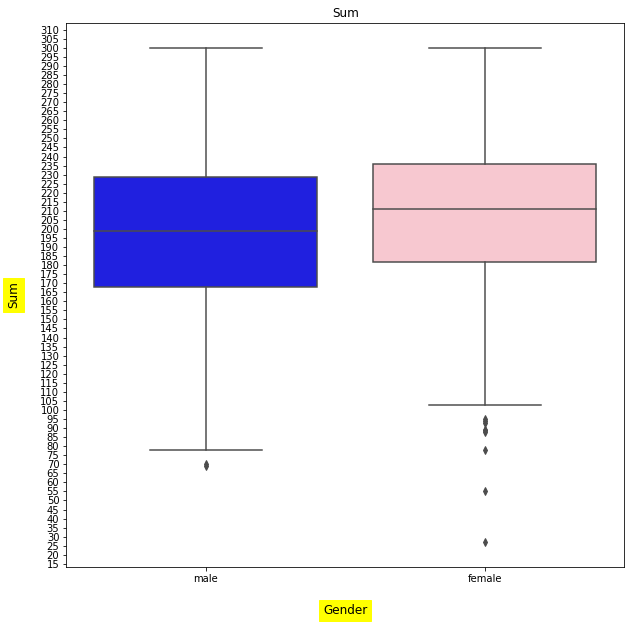

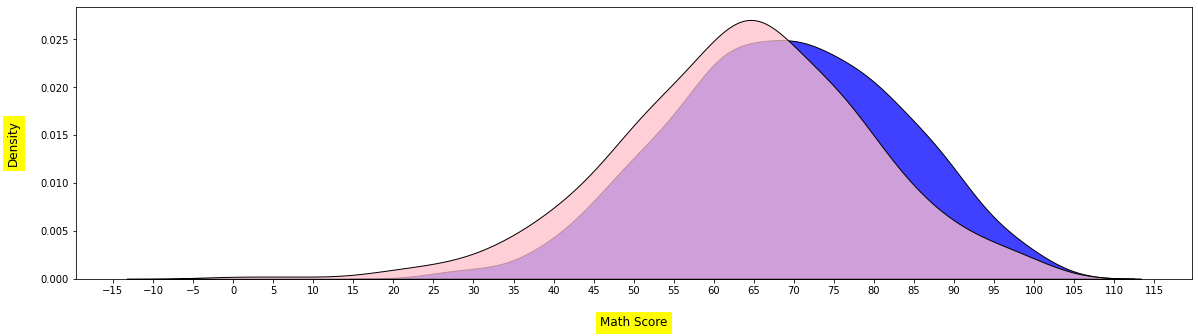

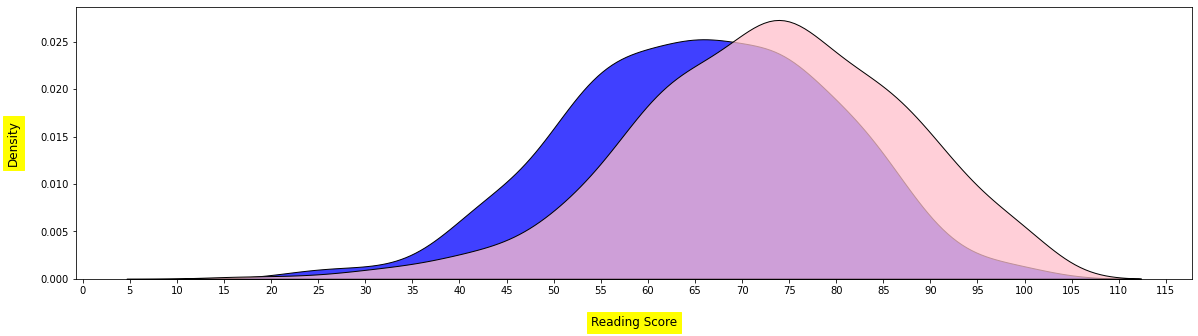

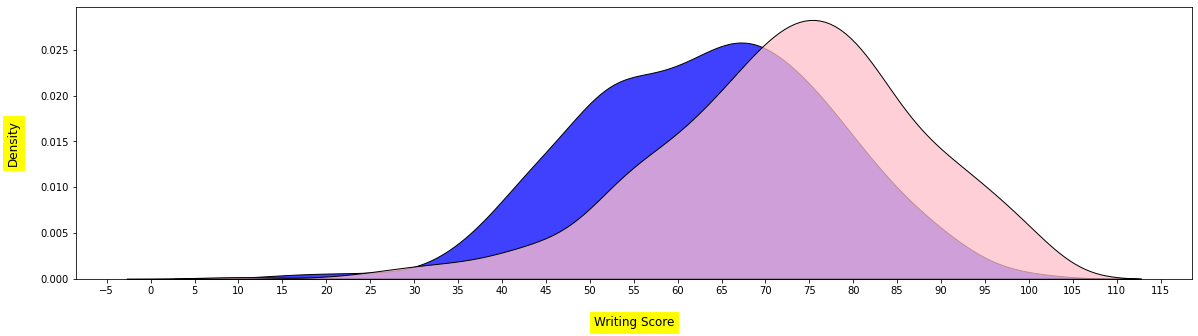

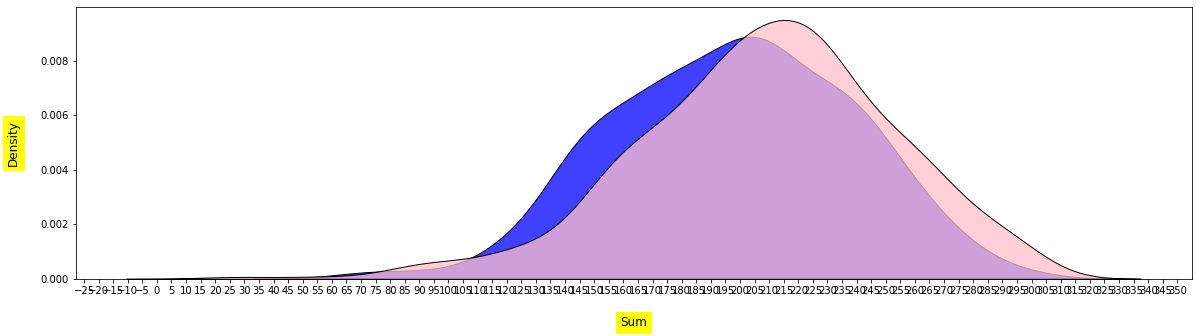

In [24]:
for i in lst:
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.boxplot(x = data['gender'], y = data[i], palette = ['blue','pink'],order = ['male','female'])
    tick_spacing = 5
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlabel('Gender', size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    ax.set_ylabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    
data_female = data.loc[data['gender']== 'female']
data_male = data.loc[data['gender'] == 'male']
for i in lst:
    plt.figure(figsize = (20,5))
    ax1 = plt.subplot(111)
    sns.kdeplot(data_male[i], color = 'blue',multiple = 'stack')
    sns.kdeplot(data_female[i], color = 'pink', multiple = 'stack')
    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax1.set_ylabel('Density', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax1.set_xlabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Next comes the analysis based on our kmeans clustering.

,Ranks,gender,count,mean,std,min,25%,50%,75%,max,percentage
0,1,female,54.0,278.759259,11.462713,264.0,268.25,275.5,289.00,300.0,0.104247
1,1,male,22.0,275.818182,10.270792,263.0,267.00,275.0,280.50,300.0,0.045643
2,2,female,73.0,249.931507,7.409320,237.0,244.00,250.0,256.00,262.0,0.140927
3,2,male,75.0,247.040000,8.129758,234.0,241.00,246.0,253.50,263.0,0.155602
4,3,female,130.0,224.315385,7.222955,212.0,218.00,224.0,231.00,237.0,0.250965
5,3,male,80.0,223.587500,6.770550,213.0,218.75,223.5,230.00,235.0,0.165975
6,4,female,111.0,200.234234,6.624960,188.0,194.50,200.0,206.00,211.0,0.214286
7,4,male,106.0,201.396226,6.593907,189.0,196.00,202.5,206.75,213.0,0.219917
8,5,female,75.0,176.013333,7.262442,163.0,169.00,176.0,182.00,187.0,0.144788
9,5,male,97.0,175.927835,7.482267,163.0,170.00,176.0,182.00,189.0,0.201245


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Ranks', ylabel='percentage'>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Ranks')

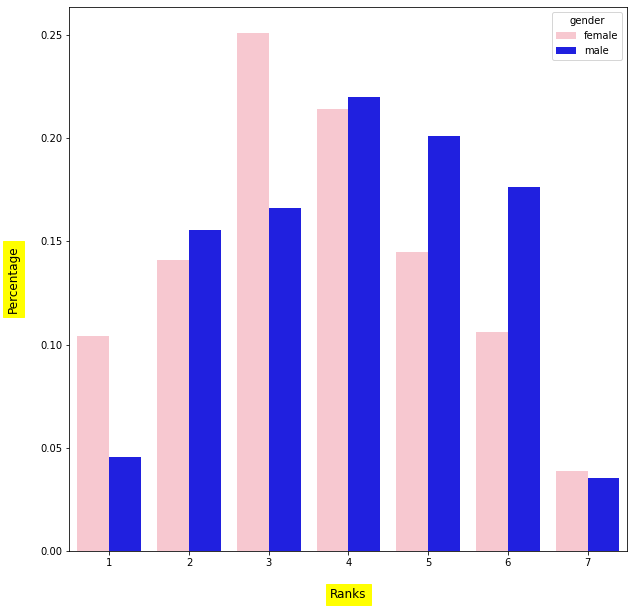

In [25]:
desc = data_with_clusters.groupby(['Ranks','gender'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_female = desc.loc[desc['gender']=='female']['count'].sum()
count_male = desc.loc[desc['gender']=='male']['count'].sum()
index_female = desc.loc[desc['gender']=='female'].index
index_male = desc.loc[desc['gender']=='male'].index
desc['percentage'] = pd.Series()
for row in index_female:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_female
for row in index_male:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_male
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'Ranks',y ='percentage' ,data = desc,hue = 'gender',palette = ['pink','blue'])
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### This is the distribution based on our kmeans clusters which tells us that in these clusters based on scores there is no clear trend and hence gender does not seem to be a major factor even though overall score average was higher for female students.

# Analysis based on Test Preparation Course

<Figure size 360x432 with 0 Axes>

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

[Text(0, 0, '642'), Text(0, 0, '358')]

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Test Preparation Course')

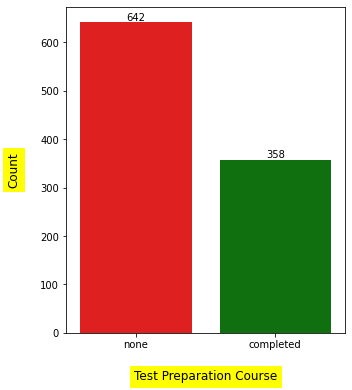

In [26]:
plt.figure(figsize = (5,6))
ax = plt.subplot(111)
sns.countplot(data['test preparation course'],palette = ['red','green'])
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Test Preparation Course', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### The number of students who have completed some course to prepare for tests is much less than those who have not.

#### Below are some descriptive stats based on individual and overall scores.

In [27]:
data.groupby(['test preparation course'])['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


In [28]:
data.groupby(['test preparation course'])['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


In [29]:
data.groupby(['test preparation course'])['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


In [30]:
data.groupby(['test preparation course'])['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,218.008380,39.110881,103.0,195.00,220.5,246.5,300.0
none,642.0,195.116822,42.560121,27.0,166.25,196.0,225.0,300.0


<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='test preparation course', ylabel='mean'>

[Text(0, 0, '64.0779'), Text(0, 0, '69.6955')]

Text(0, 0.5, 'Avg. Math Score')

Text(0.5, 0, 'Test Preparation Course')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='test preparation course', ylabel='mean'>

[Text(0, 0, '66.5343'), Text(0, 0, '73.8939')]

Text(0, 0.5, 'Avg. Reading Score')

Text(0.5, 0, 'Test Preparation Course')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='test preparation course', ylabel='mean'>

[Text(0, 0, '64.5047'), Text(0, 0, '74.419')]

Text(0, 0.5, 'Avg. Writing Score')

Text(0.5, 0, 'Test Preparation Course')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='test preparation course', ylabel='mean'>

[Text(0, 0, '195.117'), Text(0, 0, '218.008')]

Text(0, 0.5, 'Avg. Sum')

Text(0.5, 0, 'Test Preparation Course')

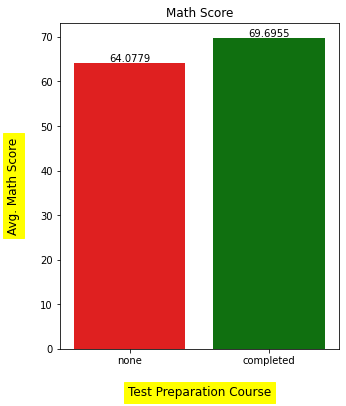

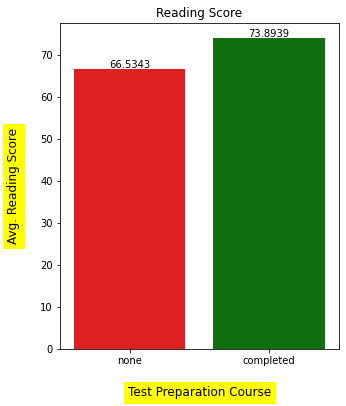

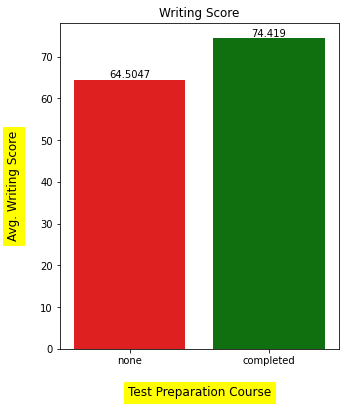

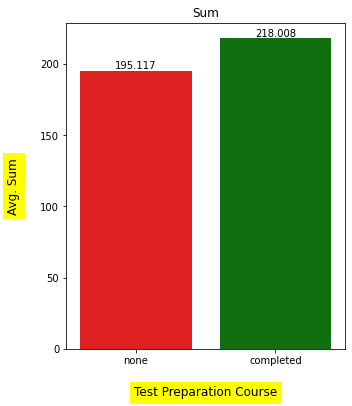

In [31]:
for i in lst:
    desc = data.groupby(['test preparation course'])[i].describe()
    desc.reset_index(level = 0,inplace = True)
    plt.figure(figsize = (5,6))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.barplot(x = 'test preparation course',y = 'mean' , data = desc, order = ['none','completed'],palette = ['red','green'])
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(f'Avg. {i.title()}', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax.set_xlabel('Test Preparation Course', size = 'large',backgroundcolor = 'yellow',labelpad = 20)


#### On average we can say that students who did some preparation course scored better.

#### Below we can see the distribution of the scores through boxplot and kdeplot forms.

In [32]:
data_completed = data.loc[data['test preparation course']== 'completed']
data_none = data.loc[data['test preparation course'] == 'none']

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='test preparation course', ylabel='math score'>

Text(0.5, 0, 'Test Completion Course')

Text(0, 0.5, 'Math Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='test preparation course', ylabel='reading score'>

Text(0.5, 0, 'Test Completion Course')

Text(0, 0.5, 'Reading Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='test preparation course', ylabel='writing score'>

Text(0.5, 0, 'Test Completion Course')

Text(0, 0.5, 'Writing Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='test preparation course', ylabel='sum'>

Text(0.5, 0, 'Test Completion Course')

Text(0, 0.5, 'Sum')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='math score', ylabel='Density'>

<AxesSubplot:xlabel='math score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Math Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Reading Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Writing Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='sum', ylabel='Density'>

<AxesSubplot:xlabel='sum', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Sum')

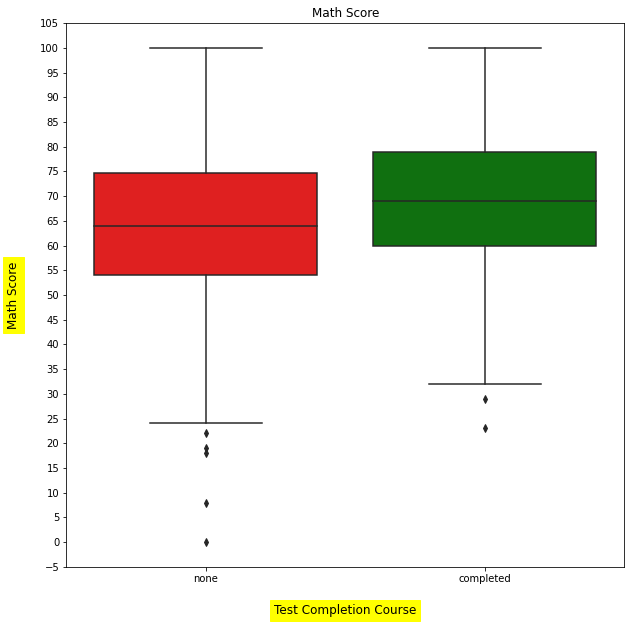

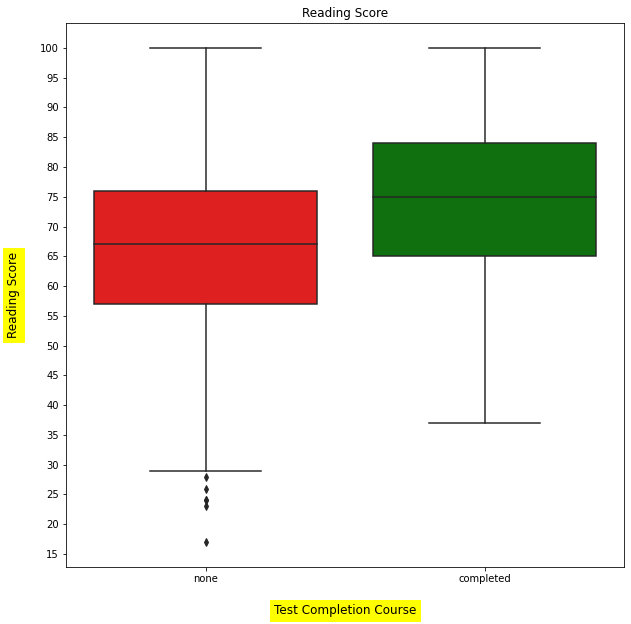

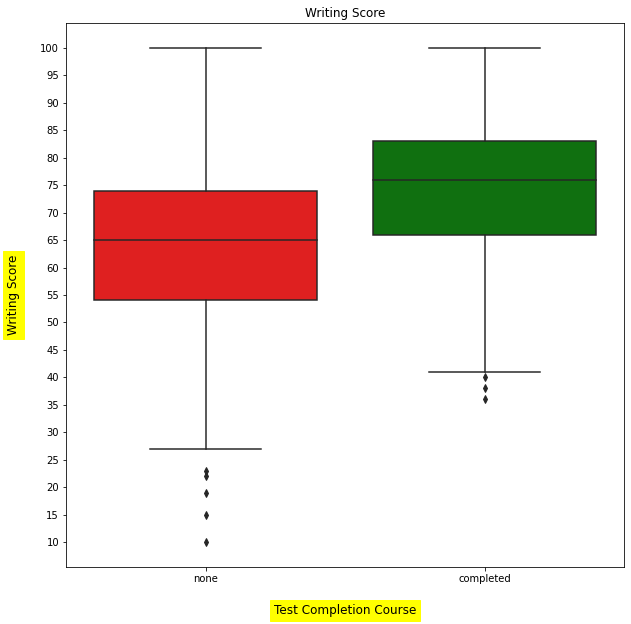

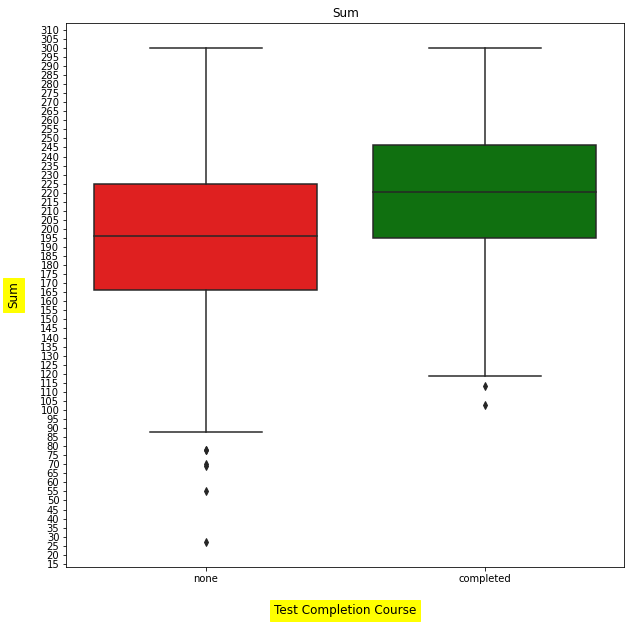

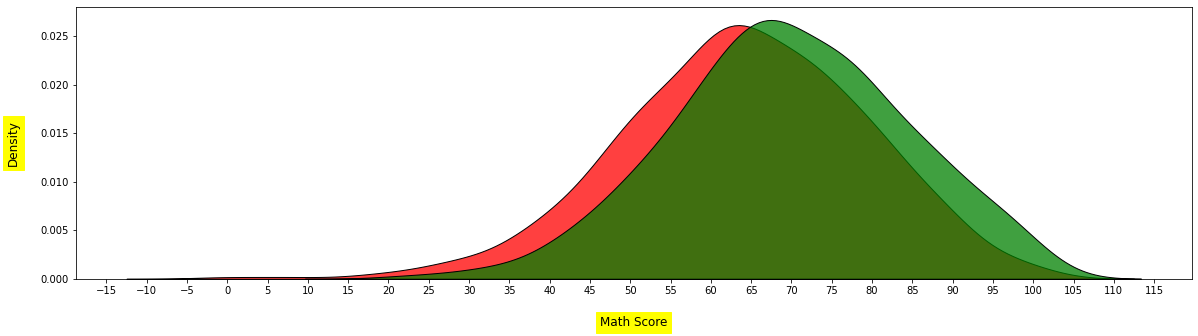

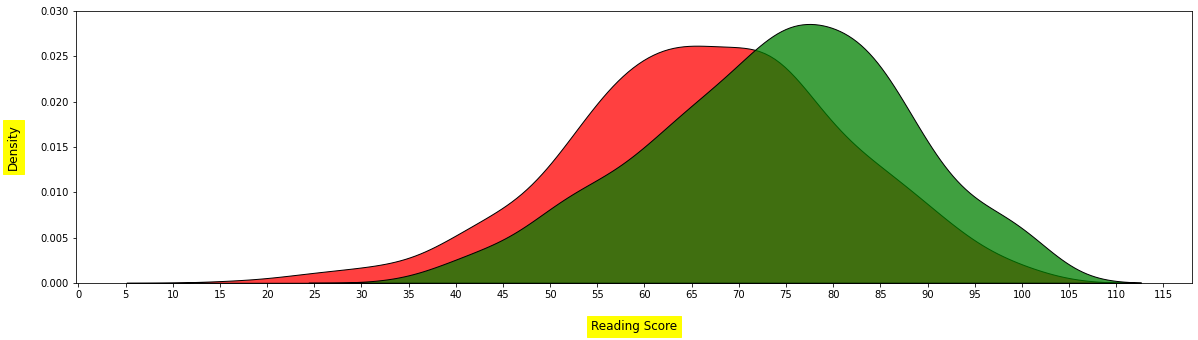

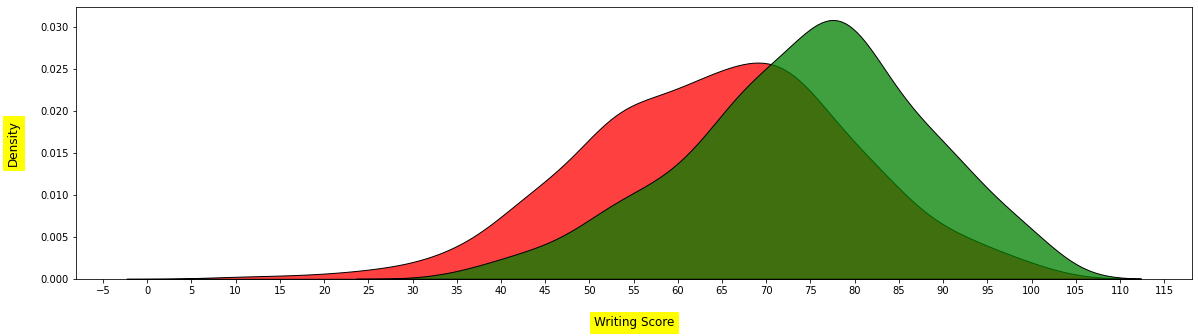

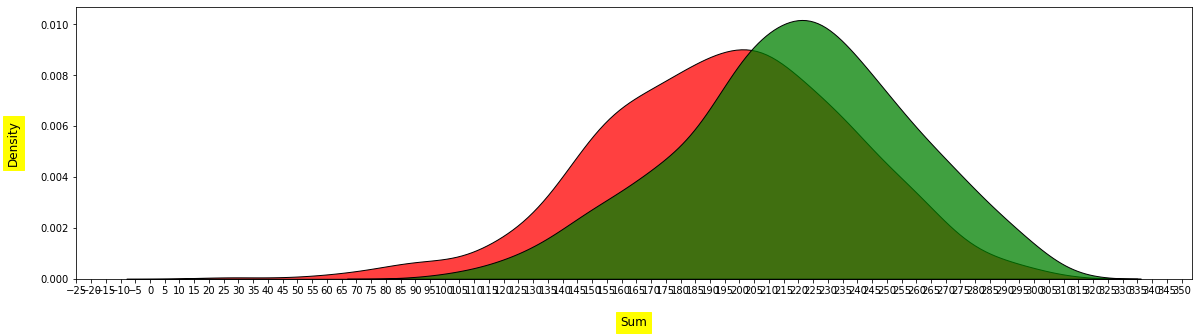

In [33]:
for i in lst:
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.boxplot(x = data['test preparation course'], y = data[i], palette = ['red','green'])
    tick_spacing = 5
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlabel('Test Completion Course', size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    ax.set_ylabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    
for i in lst:
    plt.figure(figsize = (20,5))
    ax1 = plt.subplot(111)
    sns.kdeplot(data_none[i], color = 'red',multiple = 'stack')
    sns.kdeplot(data_completed[i], color = 'green',multiple = 'stack' )
    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax1.set_ylabel('Density', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax1.set_xlabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Next comes the analysis based on our kmeans clustering.

,Ranks,test preparation course,count,mean,std,min,25%,50%,75%,max,percentage
0,1,completed,47.0,278.553191,10.866399,263.0,269.50,275.0,288.50,300.0,0.131285
1,1,none,29.0,276.862069,11.697754,264.0,266.00,274.0,287.00,300.0,0.045171
2,2,completed,68.0,248.588235,7.271361,236.0,242.00,248.0,253.25,262.0,0.189944
3,2,none,80.0,248.362500,8.425765,234.0,240.75,248.0,255.25,263.0,0.124611
4,3,completed,93.0,224.322581,6.843215,212.0,219.00,224.0,230.00,237.0,0.259777
5,3,none,117.0,223.811966,7.225352,213.0,218.00,223.0,231.00,237.0,0.182243
6,4,completed,76.0,201.118421,6.368604,188.0,196.00,201.0,207.00,212.0,0.212291
7,4,none,141.0,200.631206,6.768004,189.0,194.00,201.0,206.00,213.0,0.219626
8,5,completed,41.0,175.024390,6.578327,163.0,169.00,176.0,180.00,186.0,0.114525
9,5,none,131.0,176.259542,7.595128,163.0,169.50,176.0,183.00,189.0,0.204050


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Ranks', ylabel='percentage'>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Ranks')

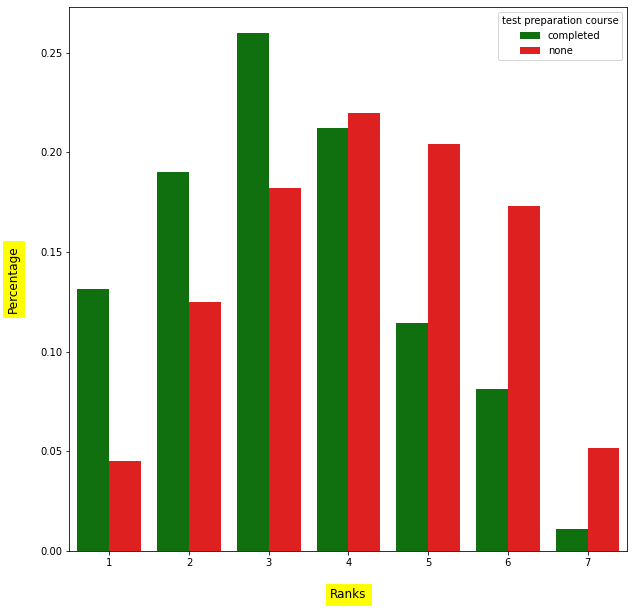

In [34]:
desc = data_with_clusters.groupby(['Ranks','test preparation course'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_none = desc.loc[desc['test preparation course']=='none']['count'].sum()
count_completed = desc.loc[desc['test preparation course']=='completed']['count'].sum()
index_none = desc.loc[desc['test preparation course']=='none'].index
index_completed = desc.loc[desc['test preparation course']=='completed'].index
desc['percentage'] = pd.Series()
for row in index_none:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_none
for row in index_completed:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_completed
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'Ranks',y ='percentage' ,data = desc,hue = 'test preparation course',palette = ['green','red'])
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Here we can clearly see that the clusters with high scoring students had high percentages of students who had done some test preparation course.

# Analysis based on Lunch type

<Figure size 360x432 with 0 Axes>

<AxesSubplot:xlabel='lunch', ylabel='count'>

[Text(0, 0, '645'), Text(0, 0, '355')]

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Lunch')

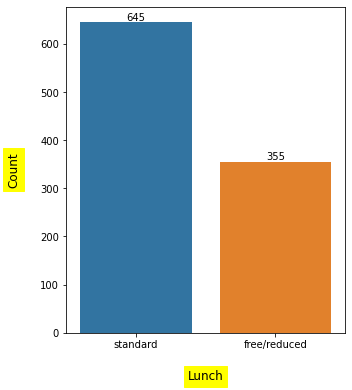

In [35]:
plt.figure(figsize = (5,6))
ax = plt.subplot(111)
sns.countplot(data['lunch'])
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Lunch', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### The count of students who eat a standard lunch is much higher than those who eat a reduced meal

#### Below are some descriptive stats for individual and overall scores.

In [36]:
data.groupby(['lunch'])['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,58.921127,15.159956,0.0,49.0,60.0,69.0,100.0
standard,645.0,70.034109,13.653501,19.0,61.0,69.0,80.0,100.0


In [37]:
data.groupby(['lunch'])['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,64.653521,14.895339,17.0,56.0,65.0,75.0,100.0
standard,645.0,71.654264,13.830602,26.0,63.0,72.0,82.0,100.0


In [38]:
data.groupby(['lunch'])['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,63.022535,15.433823,10.0,53.0,64.0,74.0,100.0
standard,645.0,70.823256,14.339487,22.0,62.0,72.0,81.0,100.0


In [39]:
data.groupby(['lunch'])['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,186.597183,43.374971,27.0,158.5,188.0,217.5,293.0
standard,645.0,212.511628,39.559515,78.0,187.0,214.0,239.0,300.0


<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='lunch', ylabel='mean'>

[Text(0, 0, '70.0341'), Text(0, 0, '58.9211')]

Text(0, 0.5, 'Avg. Math Score')

Text(0.5, 0, 'Lunch')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='lunch', ylabel='mean'>

[Text(0, 0, '71.6543'), Text(0, 0, '64.6535')]

Text(0, 0.5, 'Avg. Reading Score')

Text(0.5, 0, 'Lunch')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='lunch', ylabel='mean'>

[Text(0, 0, '70.8233'), Text(0, 0, '63.0225')]

Text(0, 0.5, 'Avg. Writing Score')

Text(0.5, 0, 'Lunch')

<Figure size 360x432 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='lunch', ylabel='mean'>

[Text(0, 0, '212.512'), Text(0, 0, '186.597')]

Text(0, 0.5, 'Avg. Sum')

Text(0.5, 0, 'Lunch')

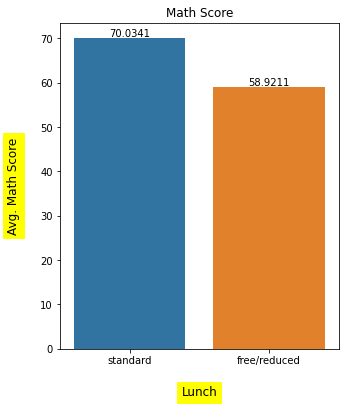

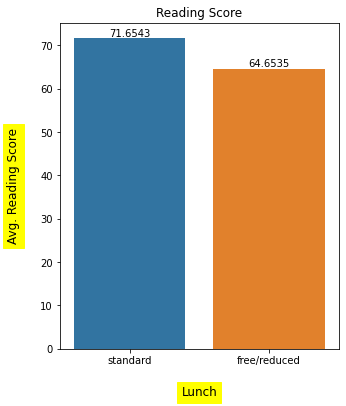

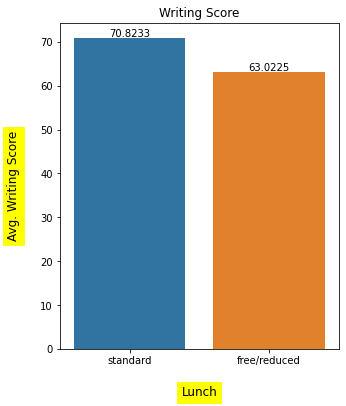

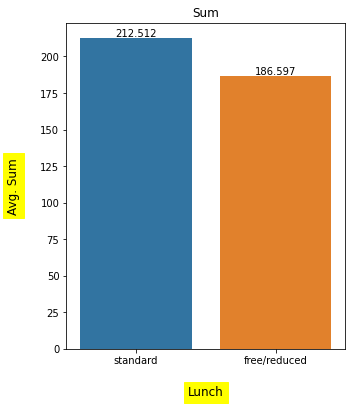

In [40]:
for i in lst:
    desc = data.groupby(['lunch'])[i].describe()
    desc.reset_index(level = 0,inplace = True)
    plt.figure(figsize = (5,6))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.barplot(x = 'lunch',y = 'mean' , data = desc, order = ['standard','free/reduced'])
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(f'Avg. {i.title()}', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax.set_xlabel('Lunch', size = 'large',backgroundcolor = 'yellow',labelpad = 20)


#### Here we can see that on average students eating a standard lunch scored better.

#### Below we can see the distribution of the scores through boxplot and kdeplot forms.

In [41]:
data_free = data.loc[data['lunch']== 'free/reduced']
data_standard = data.loc[data['lunch'] == 'standard']

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='lunch', ylabel='math score'>

Text(0.5, 0, 'Lunch')

Text(0, 0.5, 'Math Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='lunch', ylabel='reading score'>

Text(0.5, 0, 'Lunch')

Text(0, 0.5, 'Reading Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='lunch', ylabel='writing score'>

Text(0.5, 0, 'Lunch')

Text(0, 0.5, 'Writing Score')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='lunch', ylabel='sum'>

Text(0.5, 0, 'Lunch')

Text(0, 0.5, 'Sum')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='math score', ylabel='Density'>

<AxesSubplot:xlabel='math score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Math Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

<AxesSubplot:xlabel='reading score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Reading Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

<AxesSubplot:xlabel='writing score', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Writing Score')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='sum', ylabel='Density'>

<AxesSubplot:xlabel='sum', ylabel='Density'>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Sum')

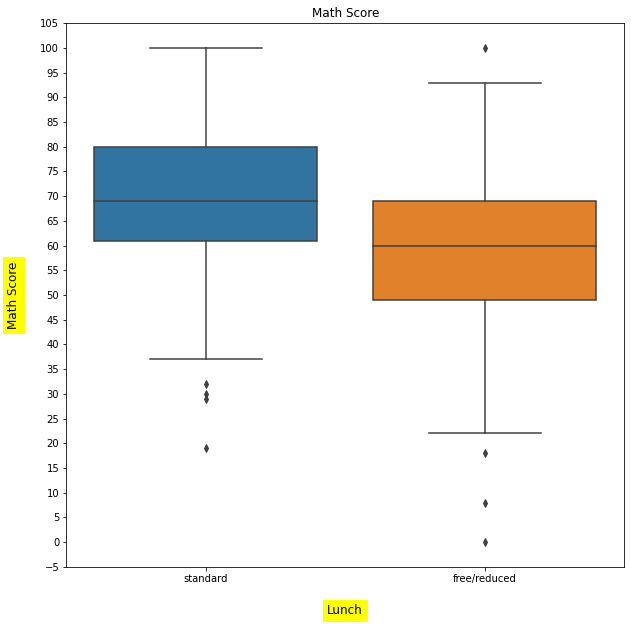

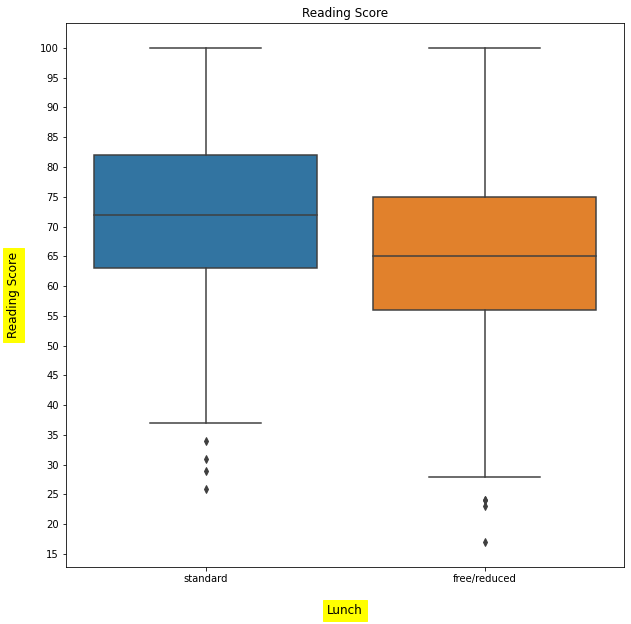

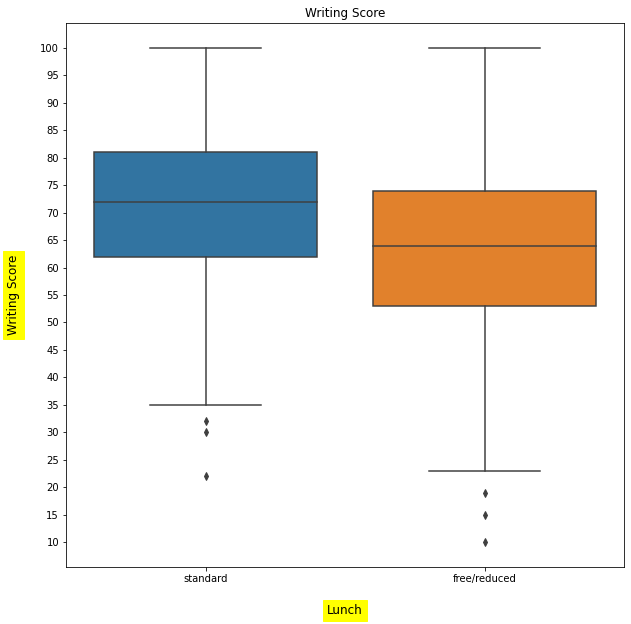

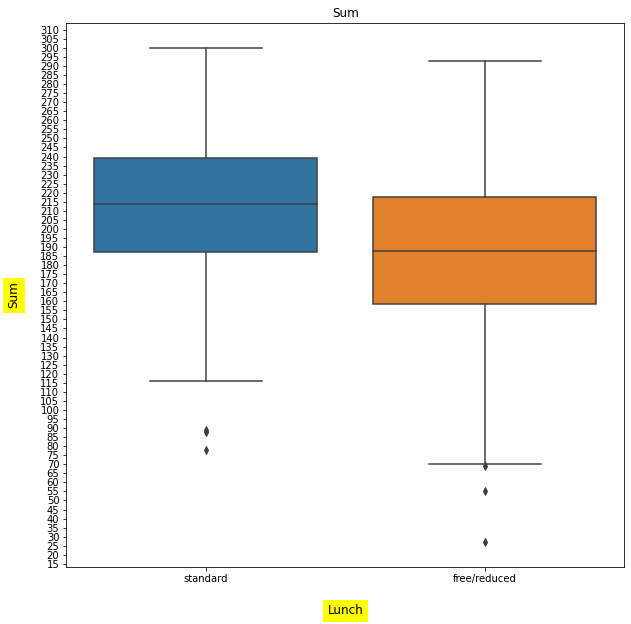

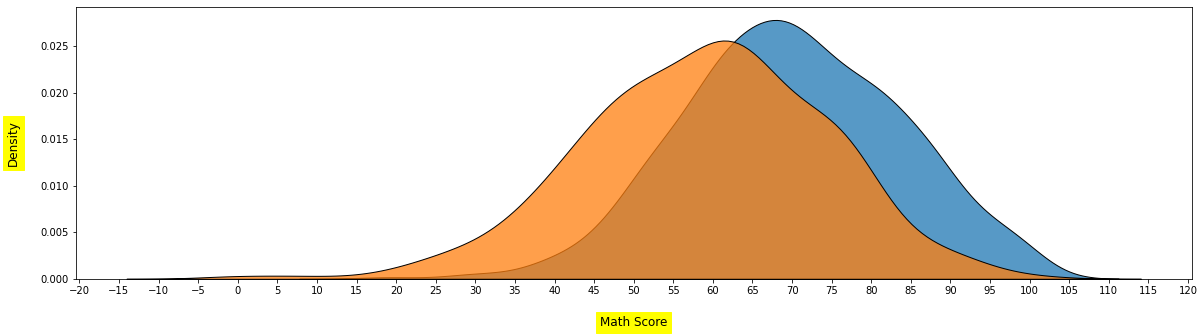

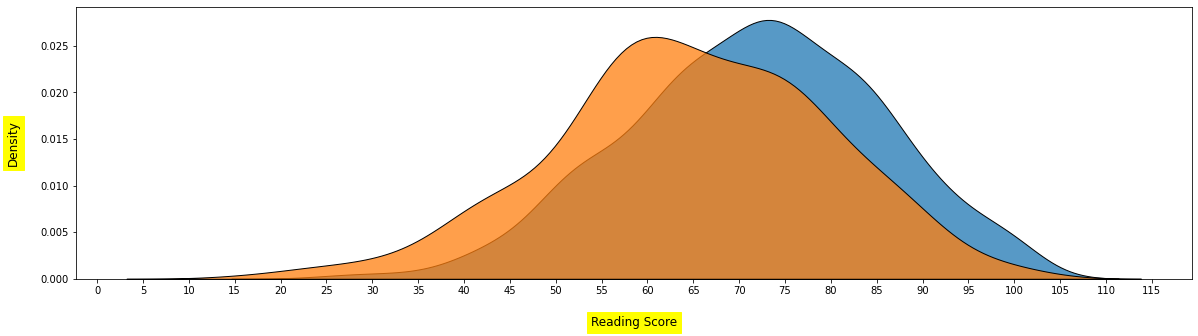

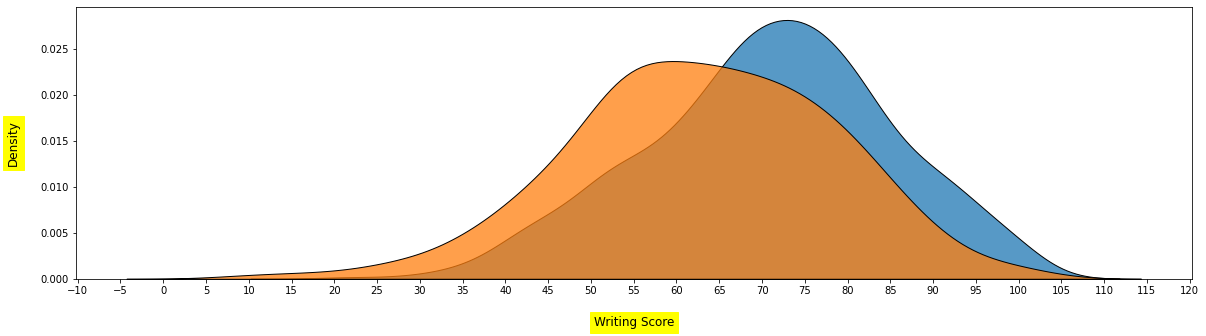

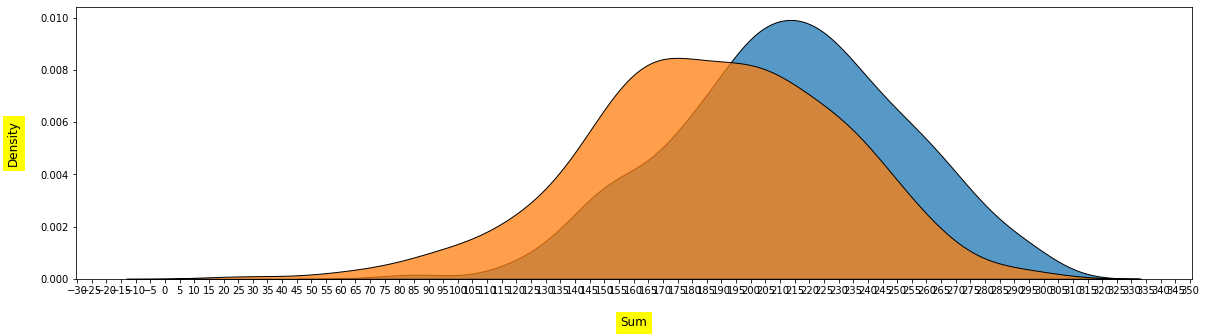

In [42]:
for i in lst:
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.boxplot(x = data['lunch'], y = data[i])
    tick_spacing = 5
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlabel('Lunch', size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    ax.set_ylabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)
    
for i in lst:
    plt.figure(figsize = (20,5))
    ax1 = plt.subplot(111)
    sns.kdeplot(data_standard[i],multiple = 'stack')
    sns.kdeplot(data_free[i],multiple = 'stack' )
    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax1.set_ylabel('Density', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax1.set_xlabel(i.title(), size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Now comes the analysis based on our kmeans clusters.

,Ranks,lunch,count,mean,std,min,25%,50%,75%,max,percentage
0,1,free/reduced,10.0,275.200000,12.934021,263.0,265.25,268.0,289.00,293.0,0.028169
1,1,standard,66.0,278.318182,10.901177,264.0,269.00,275.0,287.75,300.0,0.102326
2,2,free/reduced,31.0,248.032258,6.858007,238.0,242.00,249.0,252.50,262.0,0.087324
3,2,standard,117.0,248.581197,8.165570,234.0,241.00,248.0,256.00,263.0,0.181395
4,3,free/reduced,61.0,225.032787,7.622264,212.0,219.00,226.0,231.00,237.0,0.171831
5,3,standard,149.0,223.630872,6.781681,213.0,218.00,223.0,229.00,237.0,0.231008
6,4,free/reduced,75.0,200.280000,7.075959,188.0,194.00,201.0,207.00,213.0,0.211268
7,4,standard,142.0,201.077465,6.374900,189.0,196.00,201.0,206.00,213.0,0.220155
8,5,free/reduced,77.0,174.597403,7.246160,163.0,168.00,175.0,181.00,189.0,0.216901
9,5,standard,95.0,177.073684,7.312540,163.0,172.00,178.0,183.00,189.0,0.147287


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Ranks', ylabel='percentage'>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Ranks')

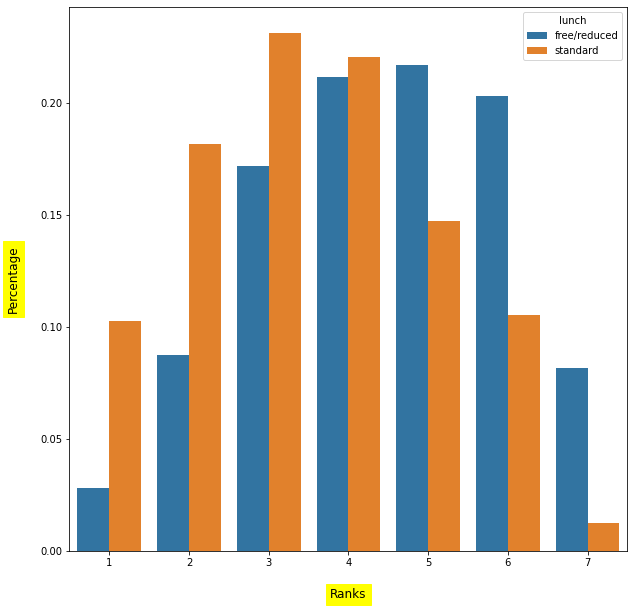

In [43]:
desc = data_with_clusters.groupby(['Ranks','lunch'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_free = desc.loc[desc['lunch']=='free/reduced']['count'].sum()
count_standard = desc.loc[desc['lunch']=='standard']['count'].sum()
index_free = desc.loc[desc['lunch']=='free/reduced'].index
index_standard = desc.loc[desc['lunch']=='standard'].index
desc['percentage'] = pd.Series()
for row in index_free:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_free
for row in index_standard:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_standard
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'Ranks',y ='percentage' ,data = desc,hue = 'lunch')
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### We can easily notice the trend that of the students who eat a standard lunch high percentage are scoring well. Hence proper nourishment is important

# Analysis based on Parental Level of Education

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='parental level of education v2', ylabel='count'>

[Text(0, 0, '601'), Text(0, 0, '222'), Text(0, 0, '177')]

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Parental level of Education')

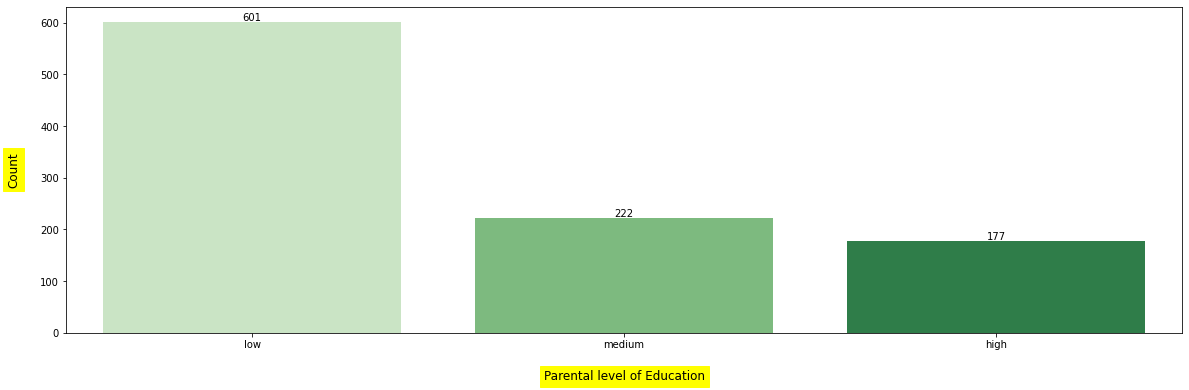

In [44]:
plt.figure(figsize = (20,6))
ax = plt.subplot(111)
sns.countplot(data['parental level of education v2'],palette = 'Greens',order = ['low','medium','high'] )
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Parental level of Education', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Here we can see that most of the parents only have a high school education or are college dropouts.

#### Some descriptive stats for individual and overall scores can be seen below

In [45]:
data.groupby(['parental level of education v2'])['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education v2,,,,,,,,
high,177.0,69.508475,14.971988,29.0,61.0,70.0,80.0,100.0
low,601.0,64.419301,15.017009,0.0,55.0,65.0,74.0,100.0
medium,222.0,67.882883,15.112093,26.0,57.0,67.0,80.0,100.0


In [46]:
data.groupby(['parental level of education v2'])['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education v2,,,,,,,,
high,177.0,73.790960,14.122690,41.0,64.0,73.0,84.0,100.0
low,601.0,67.158070,14.631130,17.0,58.0,68.0,78.0,100.0
medium,222.0,70.927928,13.868948,31.0,61.0,72.5,81.0,100.0


In [47]:
data.groupby(['parental level of education v2'])['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education v2,,,,,,,,
high,177.0,74.146893,14.405290,38.0,65.0,74.0,84.0,100.0
low,601.0,65.579035,15.159513,10.0,55.0,67.0,77.0,100.0
medium,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0


<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='parental level of education v2', ylabel='mean'>

[Text(0, 0, '64.4193'), Text(0, 0, '67.8829'), Text(0, 0, '69.5085')]

Text(0, 0.5, 'Avg. Math Score')

Text(0.5, 0, 'Parental Level of education')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='parental level of education v2', ylabel='mean'>

[Text(0, 0, '67.1581'), Text(0, 0, '70.9279'), Text(0, 0, '73.791')]

Text(0, 0.5, 'Avg. Reading Score')

Text(0.5, 0, 'Parental Level of education')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='parental level of education v2', ylabel='mean'>

[Text(0, 0, '65.579'), Text(0, 0, '69.8964'), Text(0, 0, '74.1469')]

Text(0, 0.5, 'Avg. Writing Score')

Text(0.5, 0, 'Parental Level of education')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='parental level of education v2', ylabel='mean'>

[Text(0, 0, '197.156'), Text(0, 0, '208.707'), Text(0, 0, '217.446')]

Text(0, 0.5, 'Avg. Sum')

Text(0.5, 0, 'Parental Level of education')

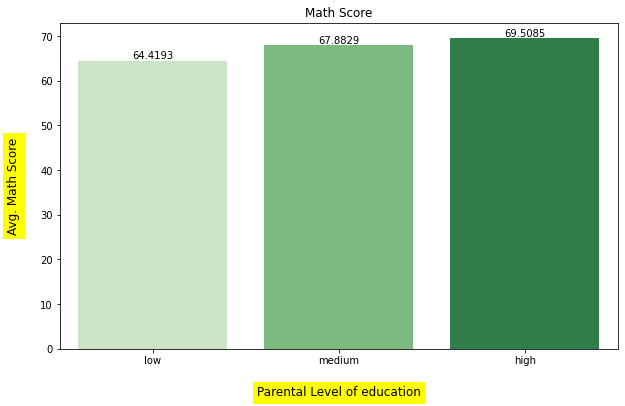

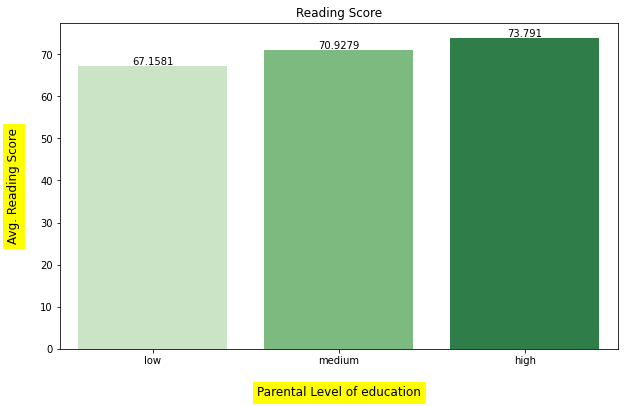

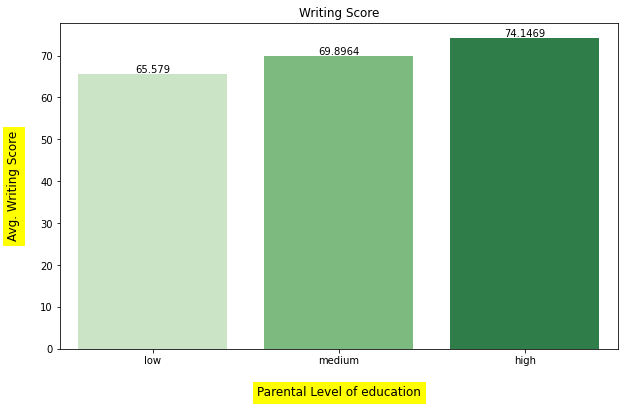

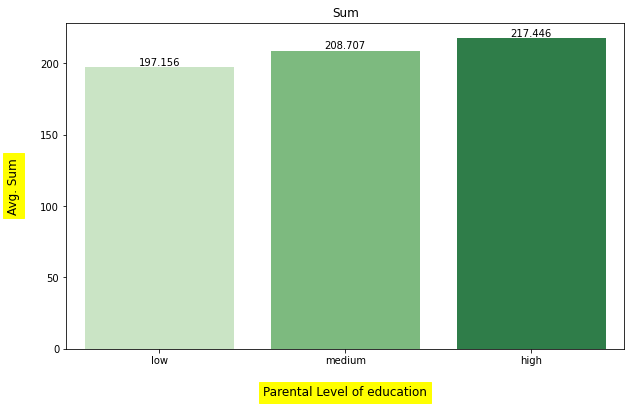

In [48]:
for i in lst:
    desc = data.groupby(['parental level of education v2'])[i].describe()
    desc.reset_index(level = 0,inplace = True)
    plt.figure(figsize = (10,6))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.barplot(x = 'parental level of education v2',y = 'mean' , data = desc, order = ['low','medium','high'], palette = 'Greens')
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(f'Avg. {i.title()}', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax.set_xlabel('Parental Level of education', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Here we see that on average students whose parents have a higher level of education scored better. 

#### Now comes the analysis based on our kmeans clusters.

,Ranks,parental level of education v2,count,mean,std,min,25%,50%,75%,max,percentage
0,1,high,26.0,281.576923,12.662300,263.0,268.75,281.0,292.00,300.0,0.146893
1,1,low,27.0,276.074074,10.306555,265.0,267.00,274.0,282.00,297.0,0.044925
2,1,medium,23.0,275.913043,9.562774,264.0,268.50,275.0,280.50,300.0,0.103604
3,2,high,31.0,250.451613,7.881788,238.0,244.00,251.0,258.00,261.0,0.175141
4,2,low,83.0,247.409639,7.570862,234.0,241.00,247.0,252.00,263.0,0.138103
5,2,medium,34.0,249.235294,8.446117,237.0,241.50,249.0,256.75,262.0,0.153153
6,3,high,38.0,223.947368,7.233359,212.0,219.00,224.5,230.75,236.0,0.214689
7,3,low,120.0,223.975000,6.806401,212.0,218.75,223.0,229.00,237.0,0.199667
8,3,medium,52.0,224.250000,7.574143,213.0,216.00,225.0,232.00,237.0,0.234234
9,4,high,39.0,201.589744,6.769583,189.0,195.50,203.0,207.00,212.0,0.220339


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Ranks', ylabel='percentage'>

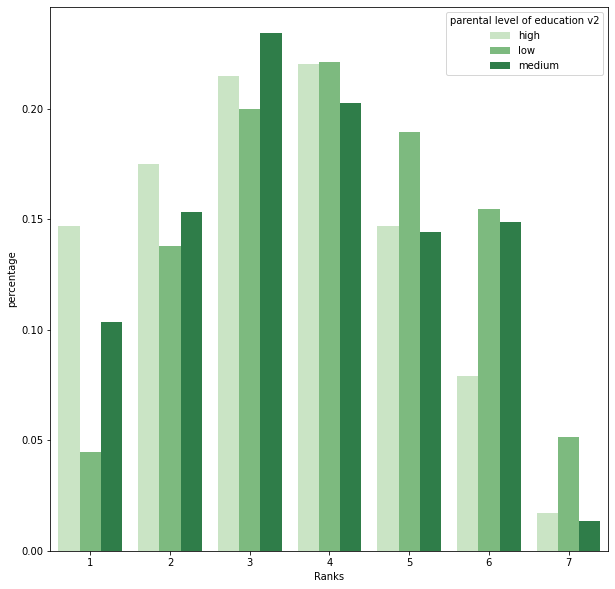

In [49]:
desc = data_with_clusters.groupby(['Ranks','parental level of education v2'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_low = desc.loc[desc['parental level of education v2']=='low']['count'].sum()
count_medium = desc.loc[desc['parental level of education v2']=='medium']['count'].sum()
count_high = desc.loc[desc['parental level of education v2']=='high']['count'].sum()
index_low = desc.loc[desc['parental level of education v2']=='low'].index
index_medium = desc.loc[desc['parental level of education v2']=='medium'].index
index_high = desc.loc[desc['parental level of education v2']=='high'].index
desc['percentage'] = pd.Series()
for row in index_low:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_low
for row in index_medium:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_medium
for row in index_high:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_high
desc
plt.figure(figsize = (10,10))
sns.barplot(x = 'Ranks',y ='percentage' ,data = desc,hue = 'parental level of education v2', palette = 'Greens')

#### Here we can see the trend that among the students whose parents have a higher level of education a higher ratio tend to do well in the examinations. However this trend is weaker than the other strong trends we have seen before

# Analysis based on Race/Ethnicity

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='race/ethnicity v2', ylabel='count'>

[Text(0, 0, '89'),
 Text(0, 0, '190'),
 Text(0, 0, '319'),
 Text(0, 0, '262'),
 Text(0, 0, '140')]

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Race/Ethnicity')

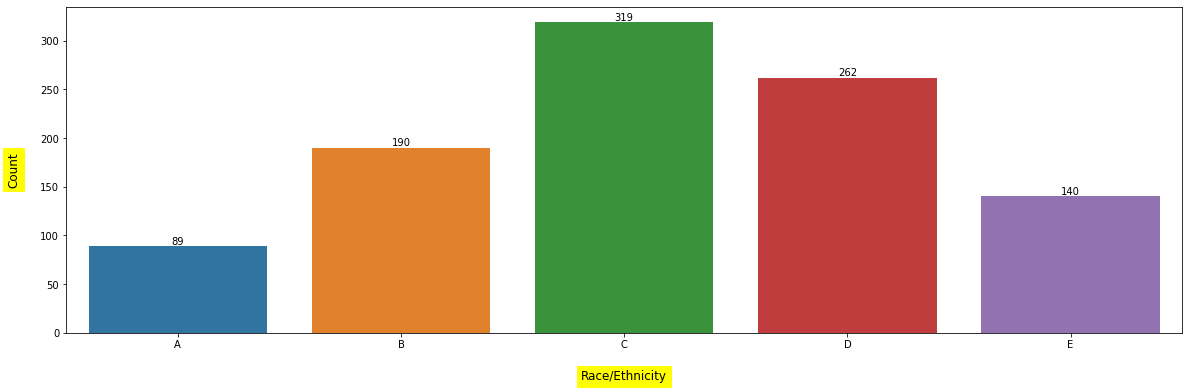

In [50]:
plt.figure(figsize = (20,6))
ax = plt.subplot(111)
sns.countplot(data['race/ethnicity v2'],order = ['A','B','C','D','E'] )
ax.bar_label(ax.containers[0])
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Race/Ethnicity', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Most of the students belong to ethnicity represented by group C and group D

#### Some descriptive stats for individual and overall scores can be seen below

In [51]:
data.groupby(['race/ethnicity v2'])['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
race/ethnicity v2,,,,,,,,
A,89.0,61.629213,14.523008,28.0,51.00,61.0,71.0,100.0
B,190.0,63.452632,15.468191,8.0,54.00,63.0,74.0,97.0
C,319.0,64.463950,14.852666,0.0,55.00,65.0,74.0,98.0
D,262.0,67.362595,13.769386,26.0,59.00,69.0,77.0,100.0
E,140.0,73.821429,15.534259,30.0,64.75,74.5,85.0,100.0


In [52]:
data.groupby(['race/ethnicity v2'])['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
race/ethnicity v2,,,,,,,,
A,89.0,64.674157,15.543762,23.0,53.00,64.0,74.00,100.0
B,190.0,67.352632,15.177499,24.0,56.00,67.0,79.75,97.0
C,319.0,69.103448,13.997033,17.0,60.00,71.0,78.50,100.0
D,262.0,70.030534,13.895306,31.0,60.25,71.0,79.00,100.0
E,140.0,73.028571,14.874024,26.0,63.00,74.0,84.00,100.0


In [53]:
data.groupby(['race/ethnicity v2'])['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
race/ethnicity v2,,,,,,,,
A,89.0,62.674157,15.468278,19.0,51.00,62.0,73.00,97.0
B,190.0,65.600000,15.625173,15.0,55.25,67.0,78.00,96.0
C,319.0,67.827586,14.983378,10.0,57.00,68.0,79.00,100.0
D,262.0,70.145038,14.367707,32.0,61.00,72.0,80.00,100.0
E,140.0,71.407143,15.113906,22.0,62.00,72.0,80.25,100.0


In [54]:
data.groupby(['race/ethnicity v2'])['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
race/ethnicity v2,,,,,,,,
A,89.0,188.977528,43.333794,70.0,156.0,184.0,219.00,289.0
B,190.0,196.405263,44.196399,55.0,170.0,195.0,230.50,290.0
C,319.0,201.394984,41.616633,27.0,173.0,205.0,231.00,296.0
D,262.0,207.538168,39.758327,93.0,181.0,210.0,235.75,297.0
E,140.0,218.257143,43.695047,78.0,194.0,220.5,247.25,300.0


<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Math Score'}, xlabel='race/ethnicity v2', ylabel='mean'>

[Text(0, 0, '61.6292'),
 Text(0, 0, '63.4526'),
 Text(0, 0, '64.4639'),
 Text(0, 0, '67.3626'),
 Text(0, 0, '73.8214')]

Text(0, 0.5, 'Avg. Math Score')

Text(0.5, 0, 'Race/Ethnicity ')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Reading Score'}, xlabel='race/ethnicity v2', ylabel='mean'>

[Text(0, 0, '64.6742'),
 Text(0, 0, '67.3526'),
 Text(0, 0, '69.1034'),
 Text(0, 0, '70.0305'),
 Text(0, 0, '73.0286')]

Text(0, 0.5, 'Avg. Reading Score')

Text(0.5, 0, 'Race/Ethnicity ')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Writing Score'}, xlabel='race/ethnicity v2', ylabel='mean'>

[Text(0, 0, '62.6742'),
 Text(0, 0, '65.6'),
 Text(0, 0, '67.8276'),
 Text(0, 0, '70.145'),
 Text(0, 0, '71.4071')]

Text(0, 0.5, 'Avg. Writing Score')

Text(0.5, 0, 'Race/Ethnicity ')

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Sum'}, xlabel='race/ethnicity v2', ylabel='mean'>

[Text(0, 0, '188.978'),
 Text(0, 0, '196.405'),
 Text(0, 0, '201.395'),
 Text(0, 0, '207.538'),
 Text(0, 0, '218.257')]

Text(0, 0.5, 'Avg. Sum')

Text(0.5, 0, 'Race/Ethnicity ')

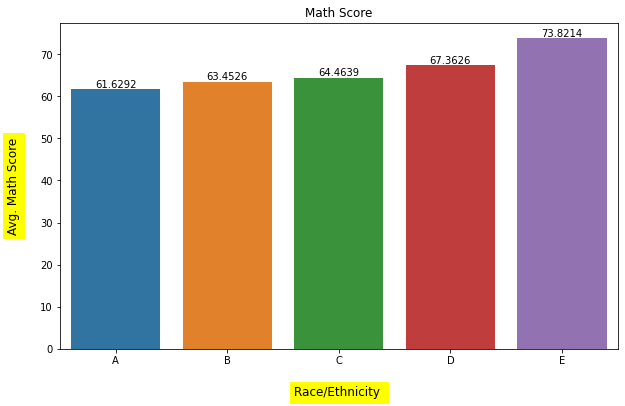

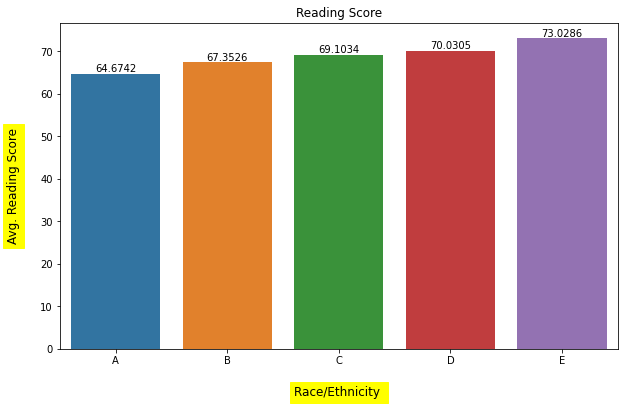

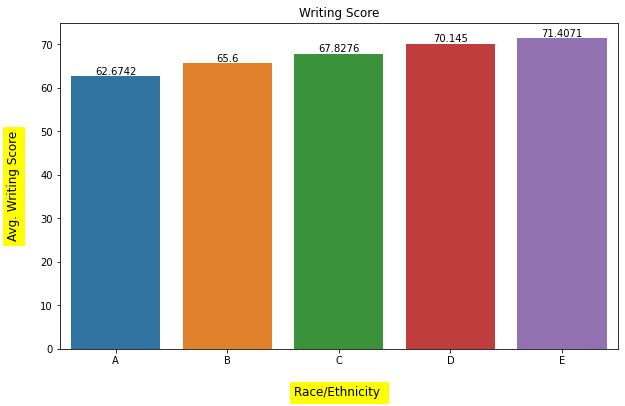

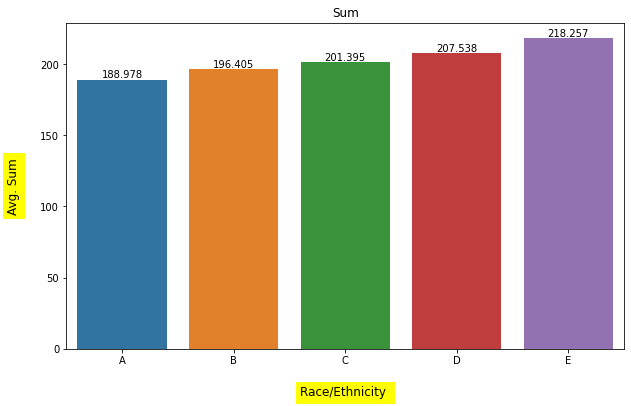

In [55]:
for i in lst:
    desc = data.groupby(['race/ethnicity v2'])[i].describe()
    desc.reset_index(level = 0,inplace = True)
    plt.figure(figsize = (10,6))
    ax = plt.subplot(111)
    ax.title.set_text(i.title())
    sns.barplot(x = 'race/ethnicity v2',y = 'mean' , data = desc)
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(f'Avg. {i.title()}', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
    ax.set_xlabel('Race/Ethnicity ', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### Here we can see that on average there is standard trend showing that students from ethnicity E tend to do well while students from group A dont.

#### Now comes the analysis based on our kmeans clusters.

,Ranks,race/ethnicity v2,count,mean,std,min,25%,50%,75%,max,percentage
0,1,A,6.0,276.666667,8.453796,267.0,269.75,277.0,281.25,289.0,0.067416
1,1,B,11.0,273.181818,7.054335,265.0,268.00,272.0,276.50,290.0,0.057895
2,1,C,21.0,275.523810,8.801245,265.0,269.00,274.0,280.00,296.0,0.065831
3,1,D,18.0,279.666667,12.653760,263.0,266.75,277.5,291.25,297.0,0.068702
4,1,E,20.0,281.800000,13.485275,264.0,267.00,282.0,293.00,300.0,0.142857
5,2,A,6.0,247.666667,8.213810,239.0,240.75,246.5,254.50,258.0,0.067416
6,2,B,28.0,247.178571,6.188721,238.0,242.75,247.0,250.25,261.0,0.147368
7,2,C,40.0,249.275000,8.202525,234.0,243.50,248.5,256.00,263.0,0.125392
8,2,D,44.0,248.386364,7.746615,237.0,241.00,249.0,254.25,262.0,0.167939
9,2,E,30.0,248.866667,9.276345,236.0,241.00,247.5,258.50,262.0,0.214286


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Ranks', ylabel='percentage'>

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Ranks')

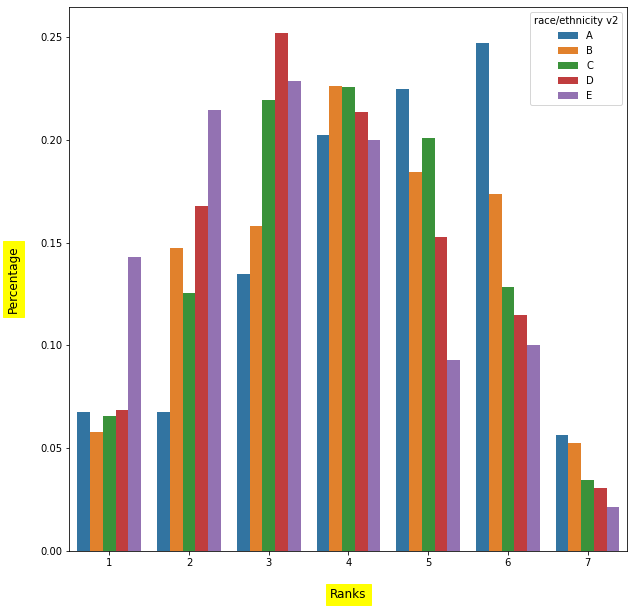

In [56]:
desc = data_with_clusters.groupby(['Ranks','race/ethnicity v2'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_a = desc.loc[desc['race/ethnicity v2']=='A']['count'].sum()
count_b = desc.loc[desc['race/ethnicity v2']=='B']['count'].sum()
count_c = desc.loc[desc['race/ethnicity v2']=='C']['count'].sum()
count_d = desc.loc[desc['race/ethnicity v2']=='D']['count'].sum()
count_e = desc.loc[desc['race/ethnicity v2']=='E']['count'].sum()
index_a = desc.loc[desc['race/ethnicity v2']=='A'].index
index_b = desc.loc[desc['race/ethnicity v2']=='B'].index
index_c = desc.loc[desc['race/ethnicity v2']=='C'].index
index_d = desc.loc[desc['race/ethnicity v2']=='D'].index
index_e = desc.loc[desc['race/ethnicity v2']=='E'].index
desc['percentage'] = pd.Series()
for row in index_a:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_a
for row in index_b:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_b
for row in index_c:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_c
for row in index_d:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_d
for row in index_e:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_e
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'Ranks',y ='percentage' ,data = desc,hue = 'race/ethnicity v2')
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

#### The trends here are same as the trends seen for averages.

# Conclusion

1. The Gender ratio is not very bad and the count of female students is a bit higher than that of male students. When it comes to scores, the gender does not play a significant or standard role in determining score. So, regardless of gender, the student can do well. 

2. Number of students who have currently availed the test preparation courses are much less than those who have not. But, according to our analysis, this needs to change and students should start using these courses to do well in examinations.

3. The Lunch type which is linked with the nourishment of the student also plays an important role in determining how the student does in the examinations. Luckily, the number of students getting a standard lunch and hence proper nourishment is high.

4. The conclusions from the Race/Ethncity feature cant be derived directly as we have to see the different conditions for people from different groups and so we have to examine the conditions for group E vs the other groups to see why the students perform better.

5. Parental level of education seems to be a relevant factor but not a major one. Also, it is factor with which conditions are linked as well.
 
Overall, taking test preparation courses and proper nourishment are beneficial for the students.